In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 0 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [1, 2], skips_model=[8], skips_snapshot=[1, 2, 3],
    h_units=False)

In [5]:
%%capture
fig, axs = plt.subplots()

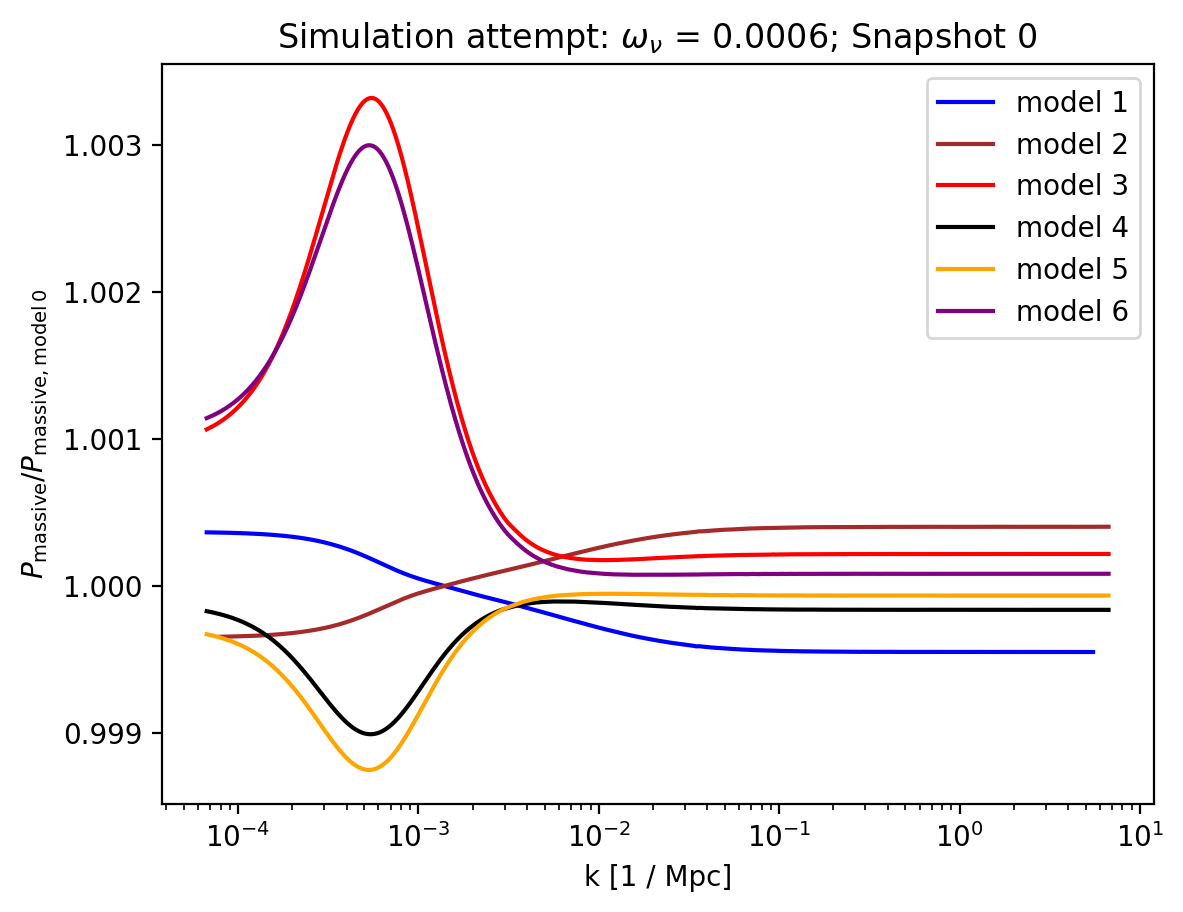

In [6]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spec_sims[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str, title="Simulation attempt")

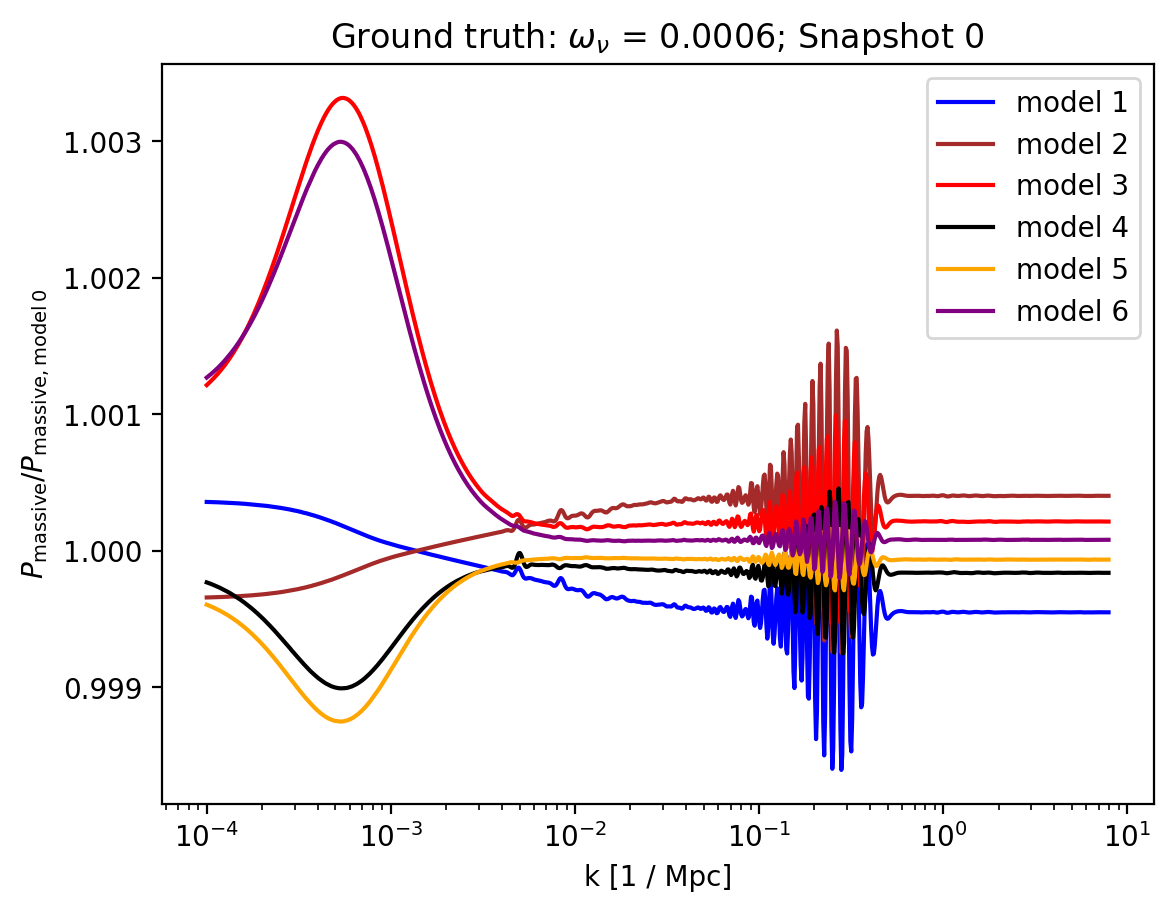

In [7]:
# What was this supposed to look like?
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str)

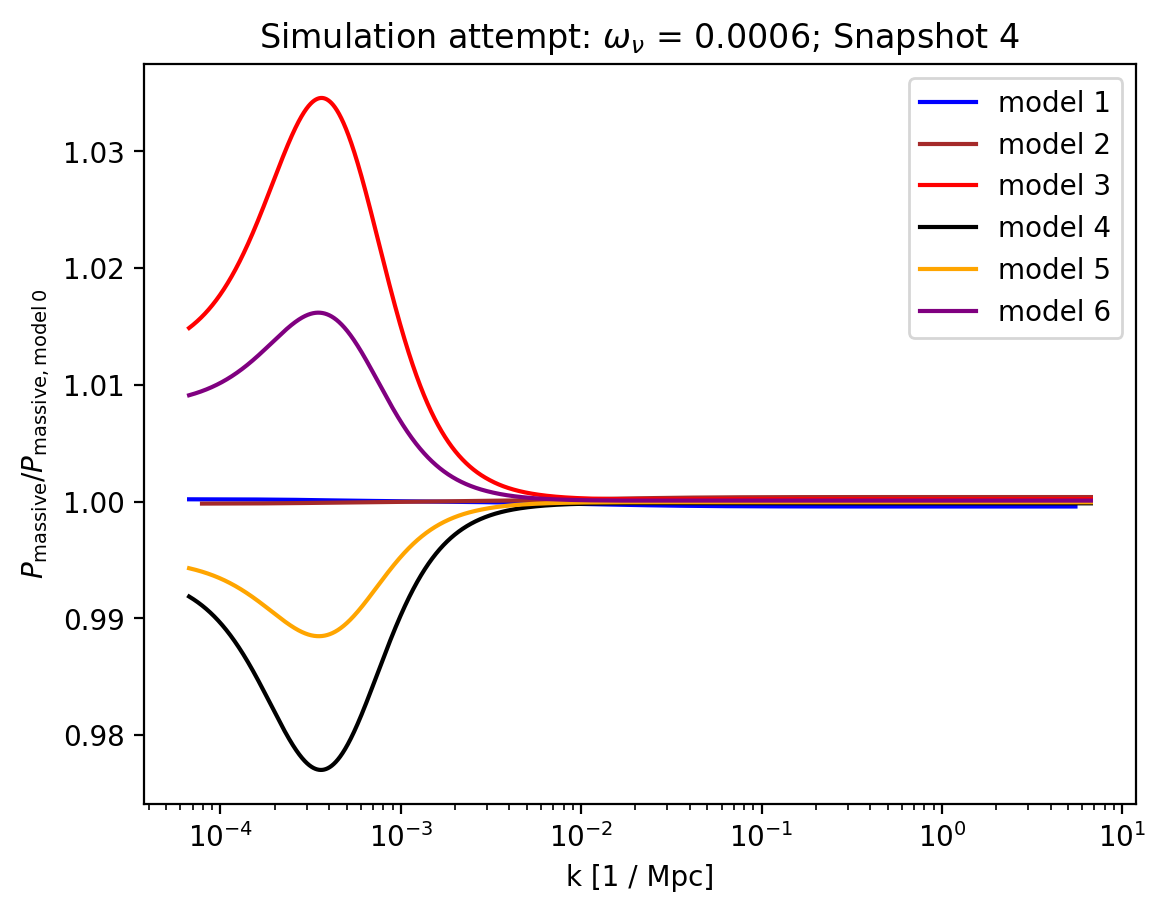

In [8]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=True, skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt")

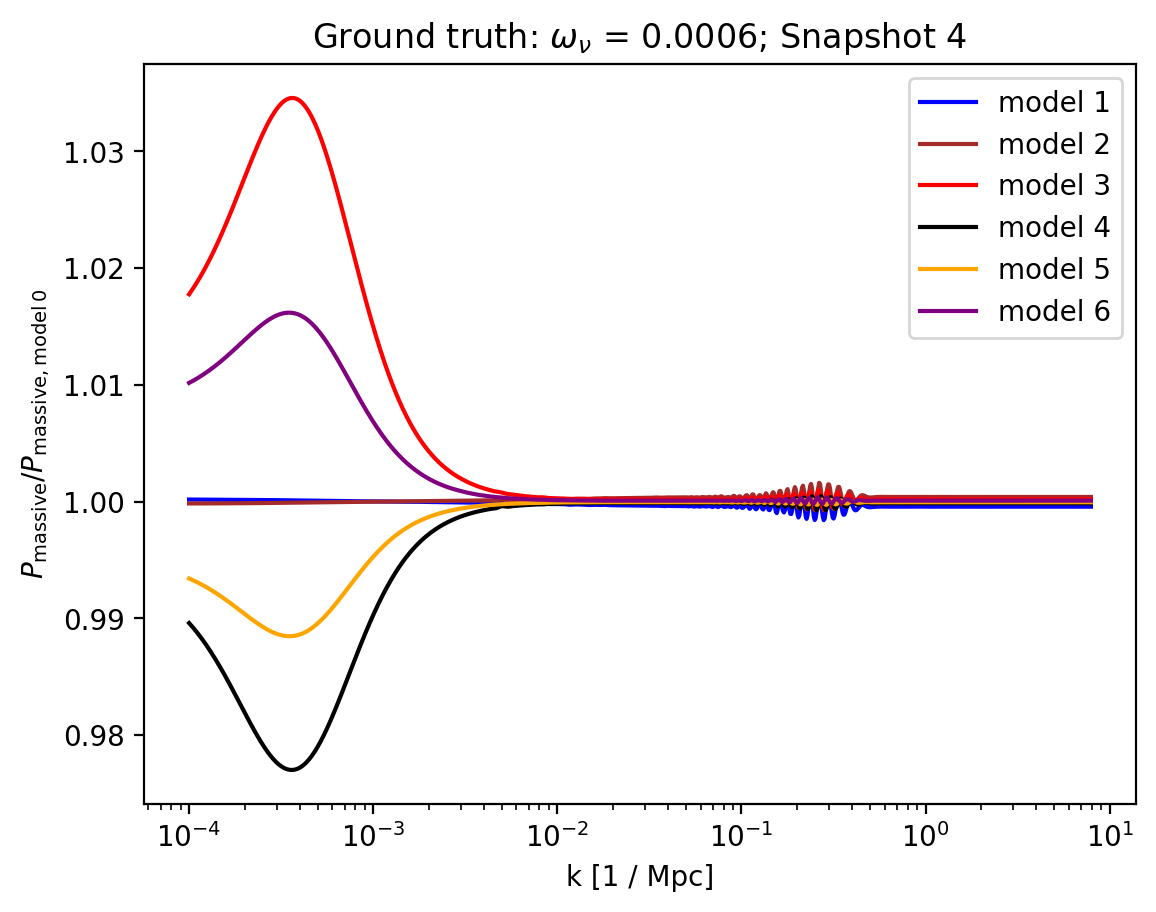

In [9]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str);

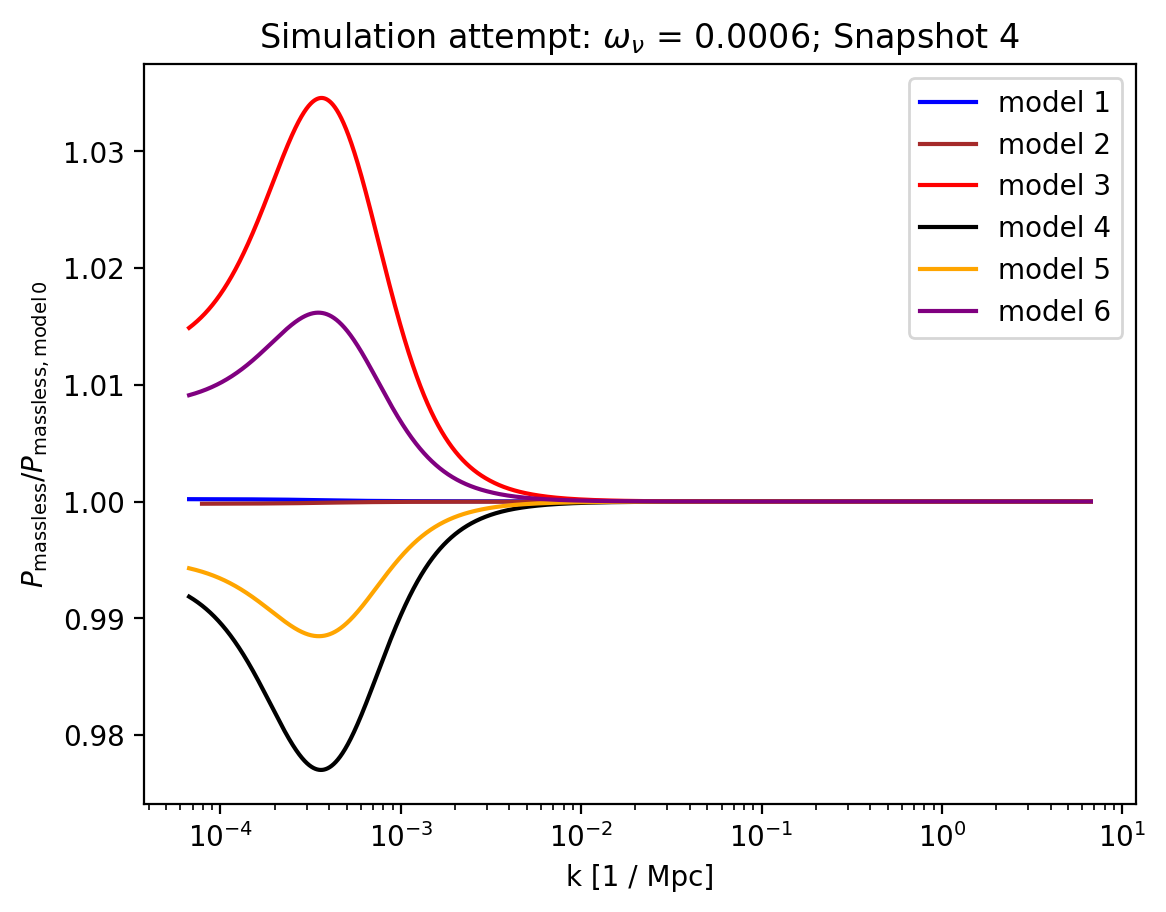

In [10]:
fig, axs = plt.subplots()
_, _ = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=False,
    skips=[7, 8], omnuh2_str=onh2_str, title="Simulation attempt")

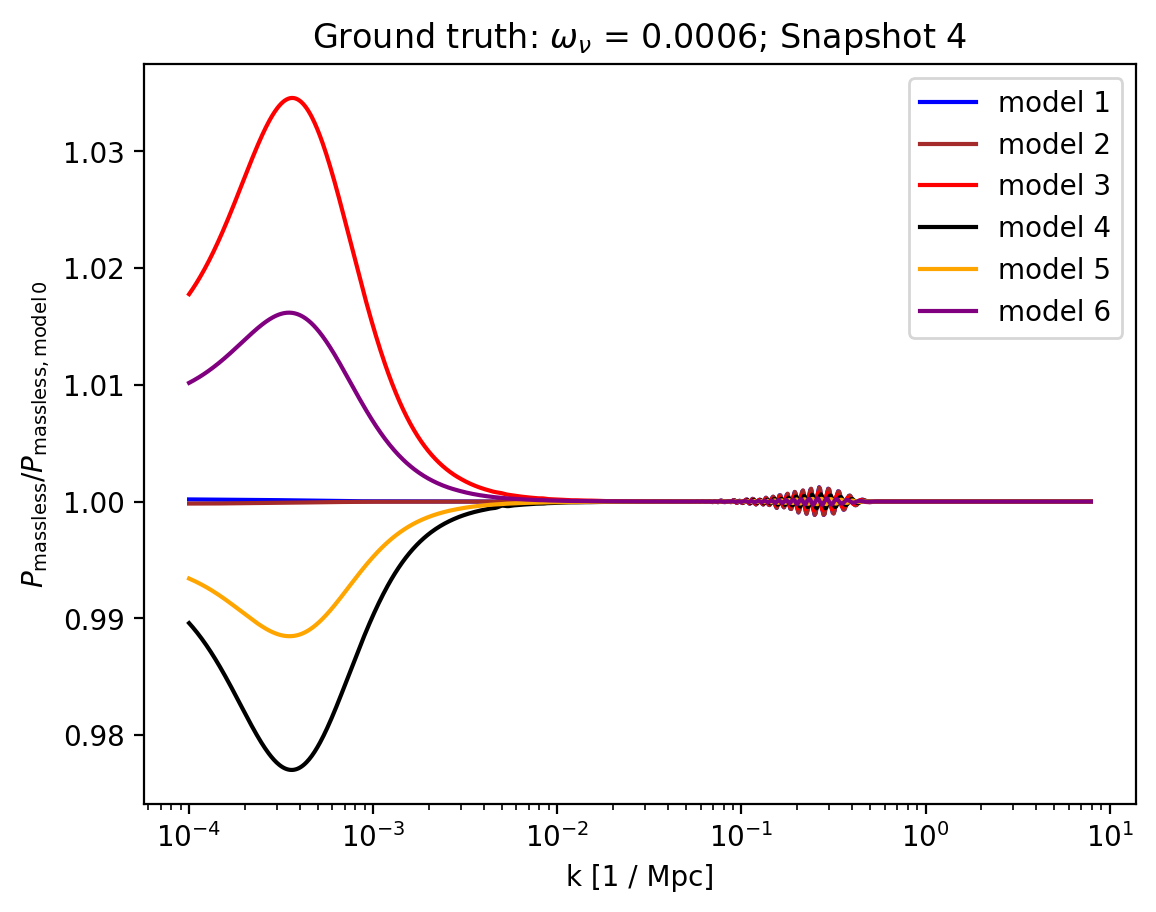

In [11]:
fig, axs = plt.subplots()
_, _ = spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive=False, skips=[7, 8], omnuh2_str=onh2_str)

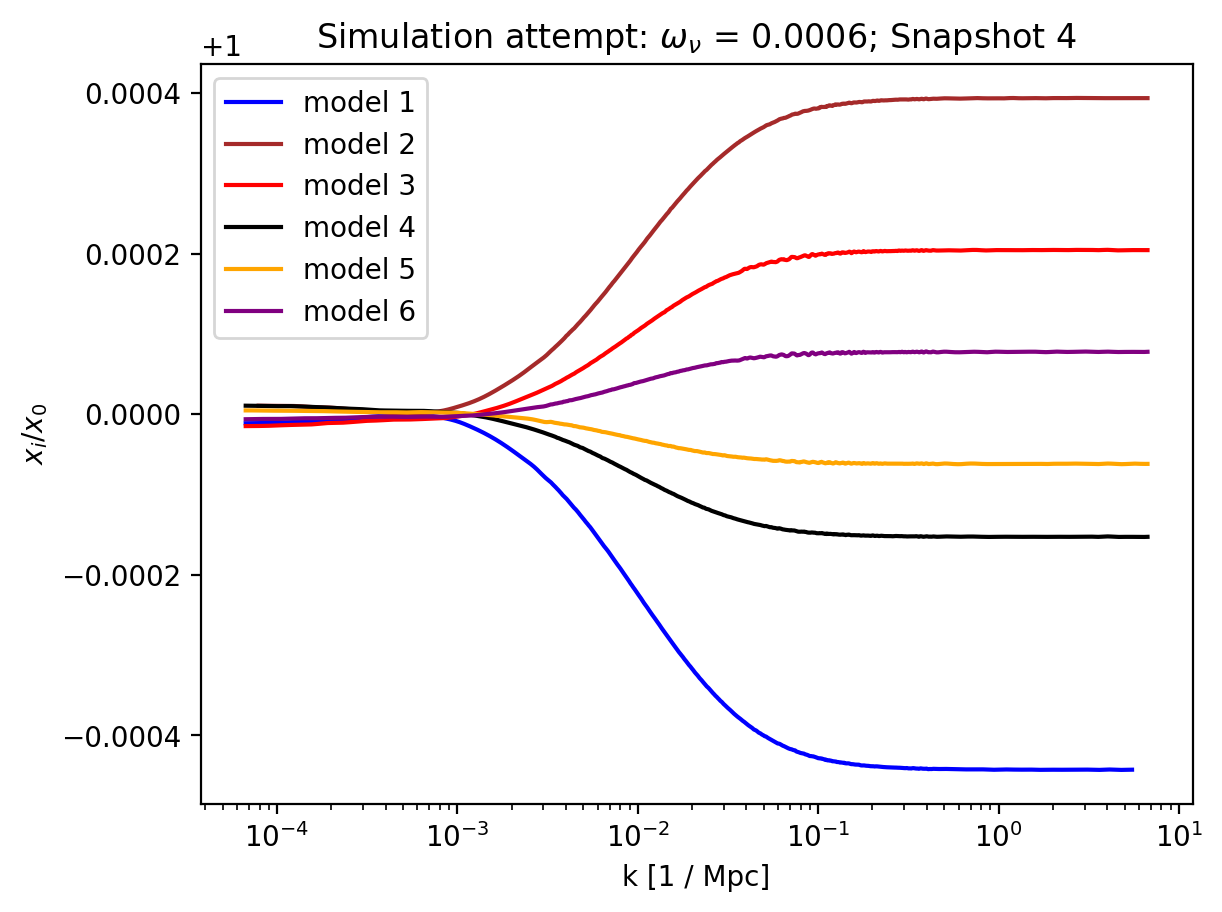

In [12]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt")

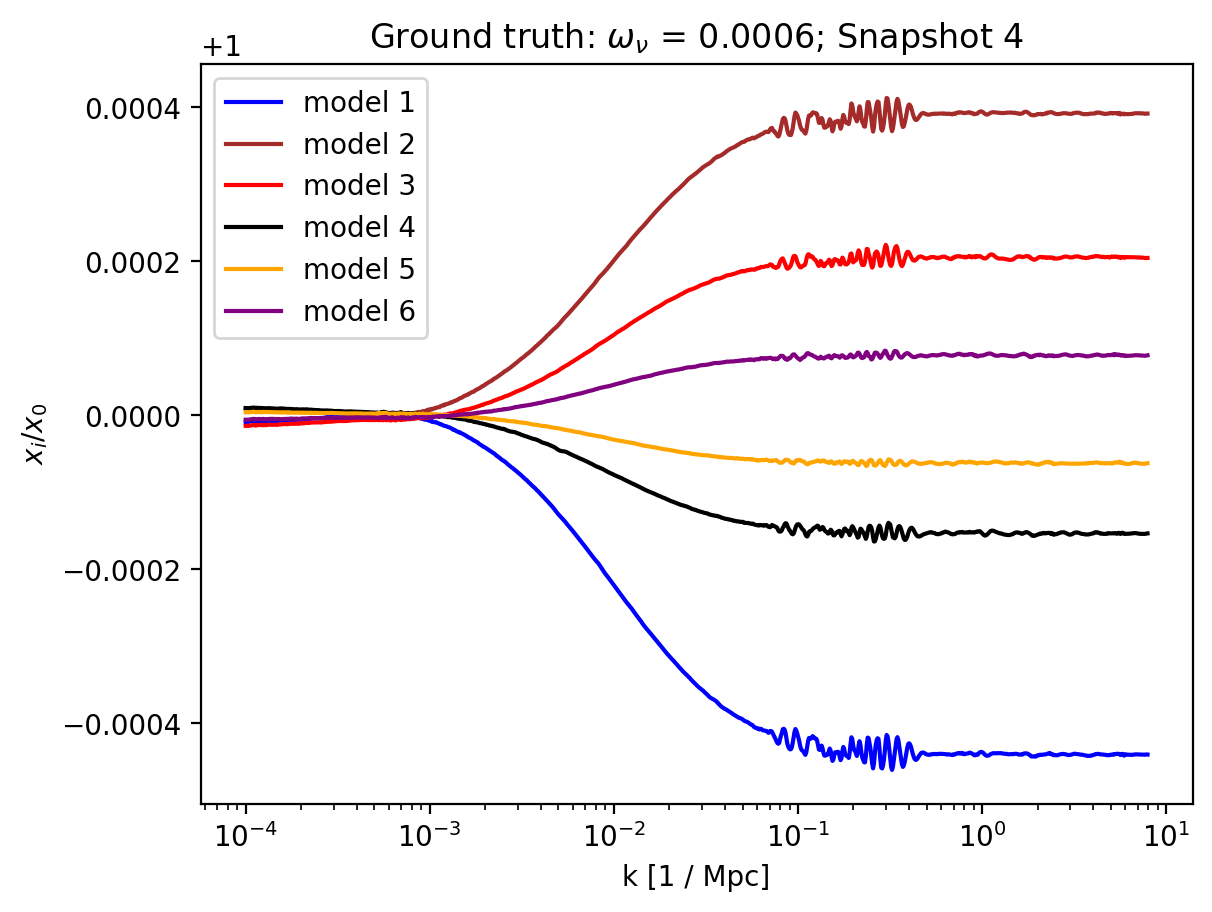

In [13]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str);

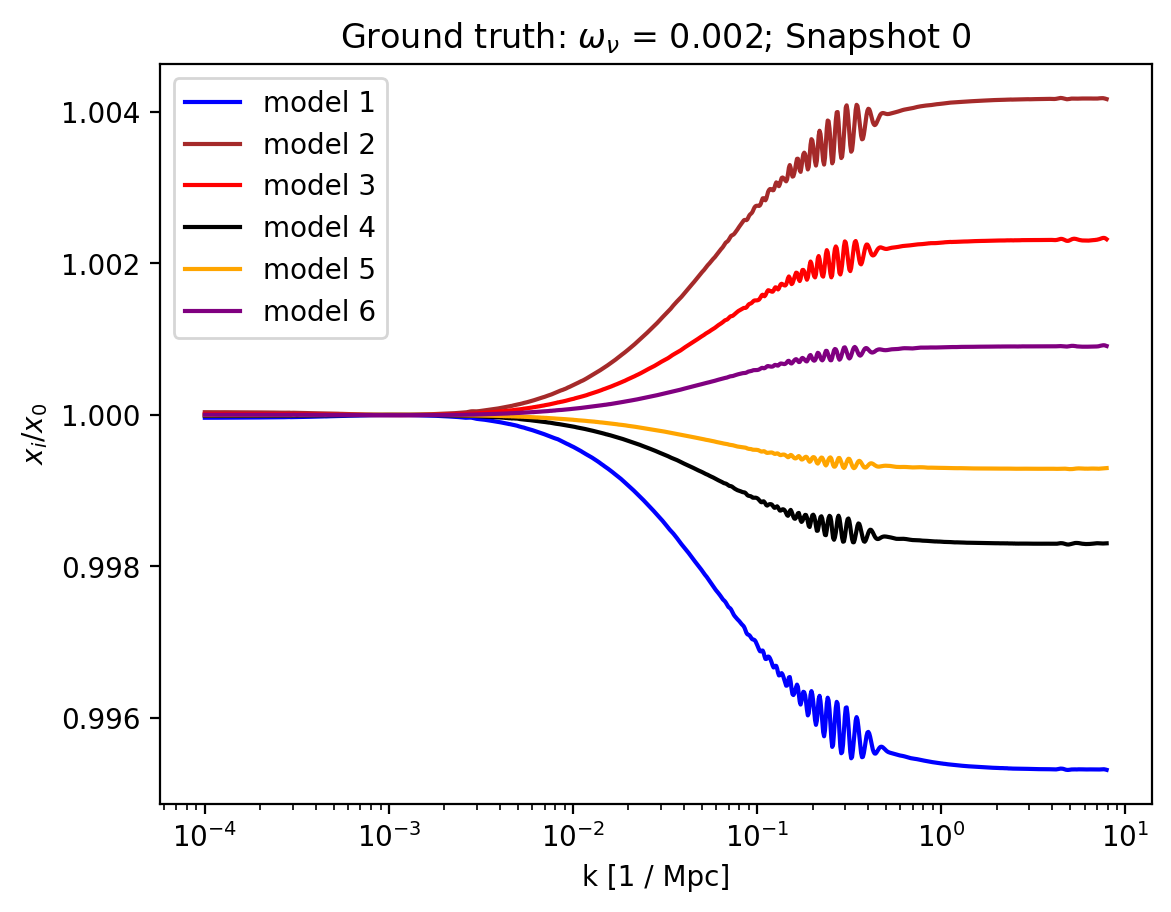

In [14]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002");

In [15]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptotes = [rats[i][len(rats[i]) - 1] for i in range(len(rats))]

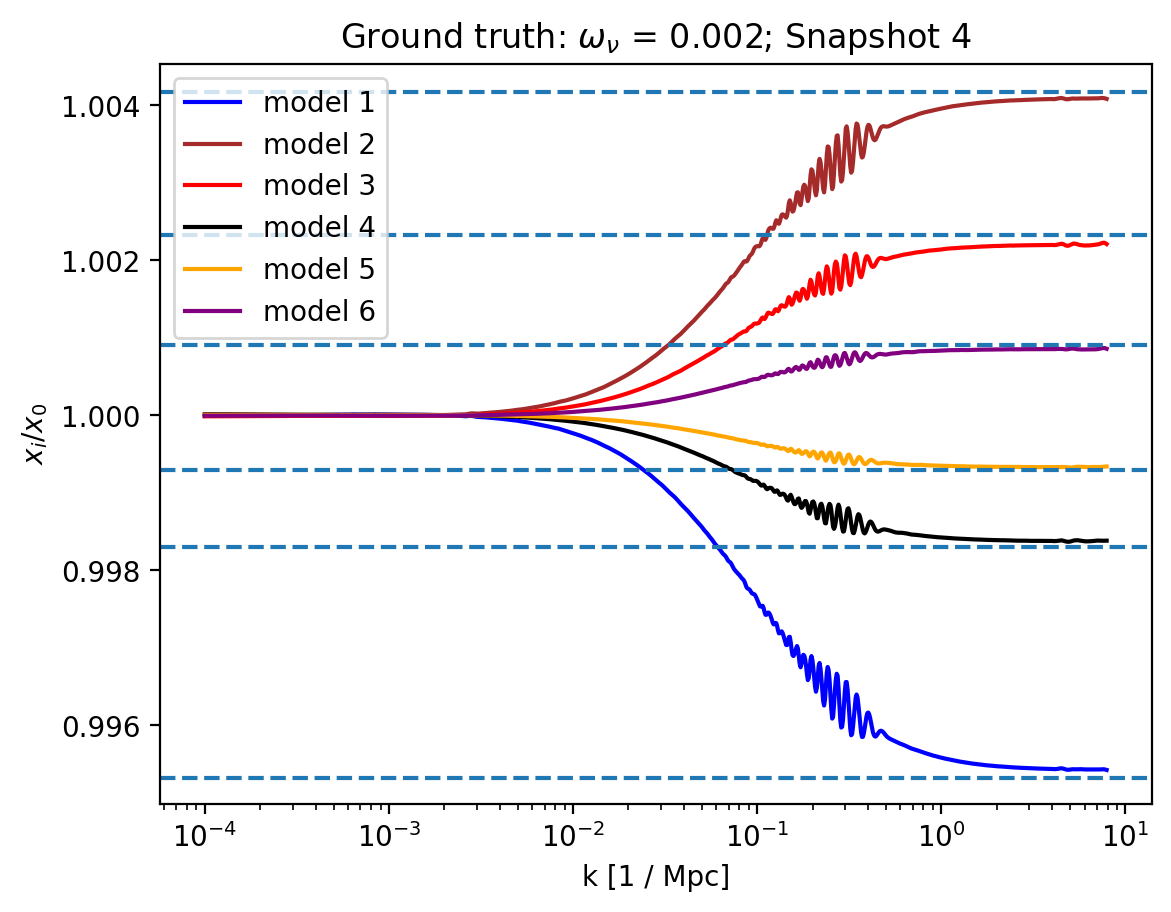

In [16]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
for asymptote in true_asymptotes:
    axs.axhline(asymptote, linestyle='--')

In [29]:
np.mean(true_asymptotes)

1.0000529246832341

0.9730217497565392
42.2107832023125
[0.00074024 0.00073818 0.00072627 0.00072163 0.00071925 0.00072154]


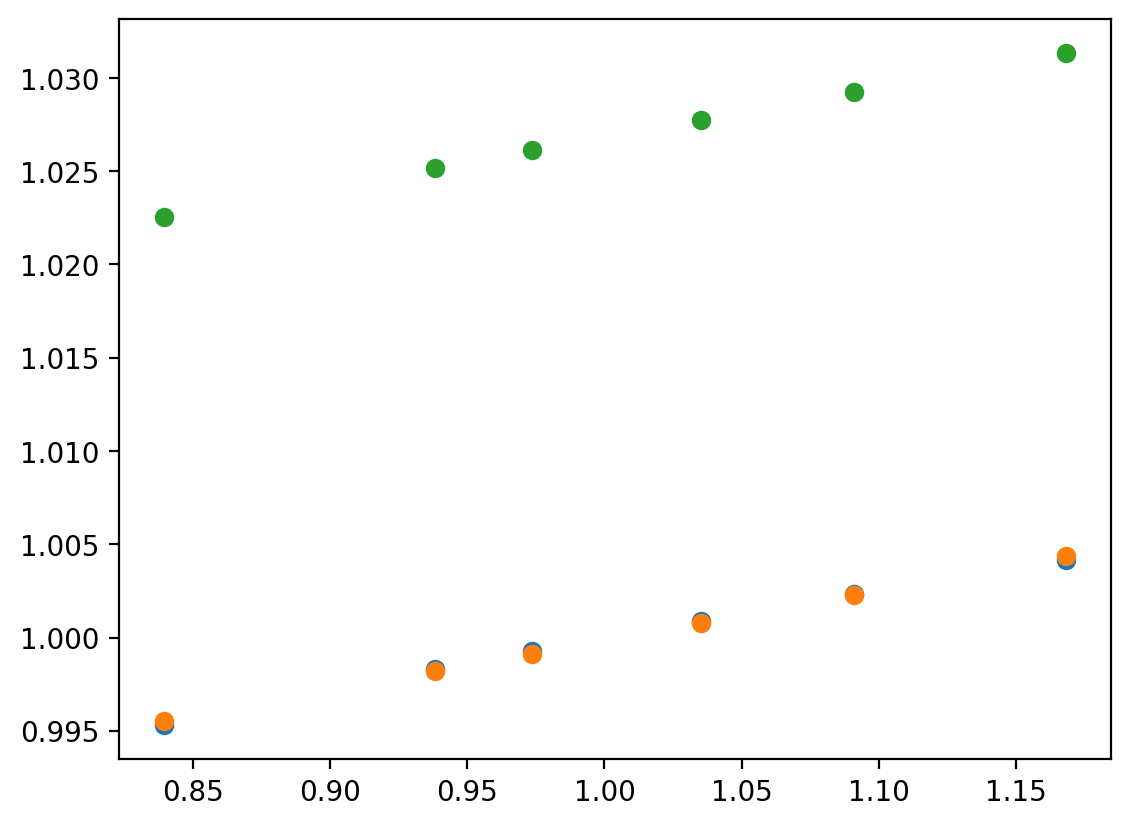

In [20]:
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(7)]
from numpy.polynomial.polynomial import polyfit

plt.scatter(A_s[1:] / A_s[0], true_asymptotes)

b, m = polyfit(onh2 * (A_s[1:] / A_s[0]), true_asymptotes, 1)
plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + b)
plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + 1)
print(b)
print(m)
print(np.square(true_asymptotes - m * onh2 * (A_s[1:] / A_s[0]) - 1))

In [21]:
C = m

In [24]:
predicted_asymptotes = C * onh2 * (A_s[1:] / A_s[0])
predicted_asymptotes

array([0.02252143, 0.03133957, 0.02926929, 0.02516813, 0.02611699,
       0.02777164])

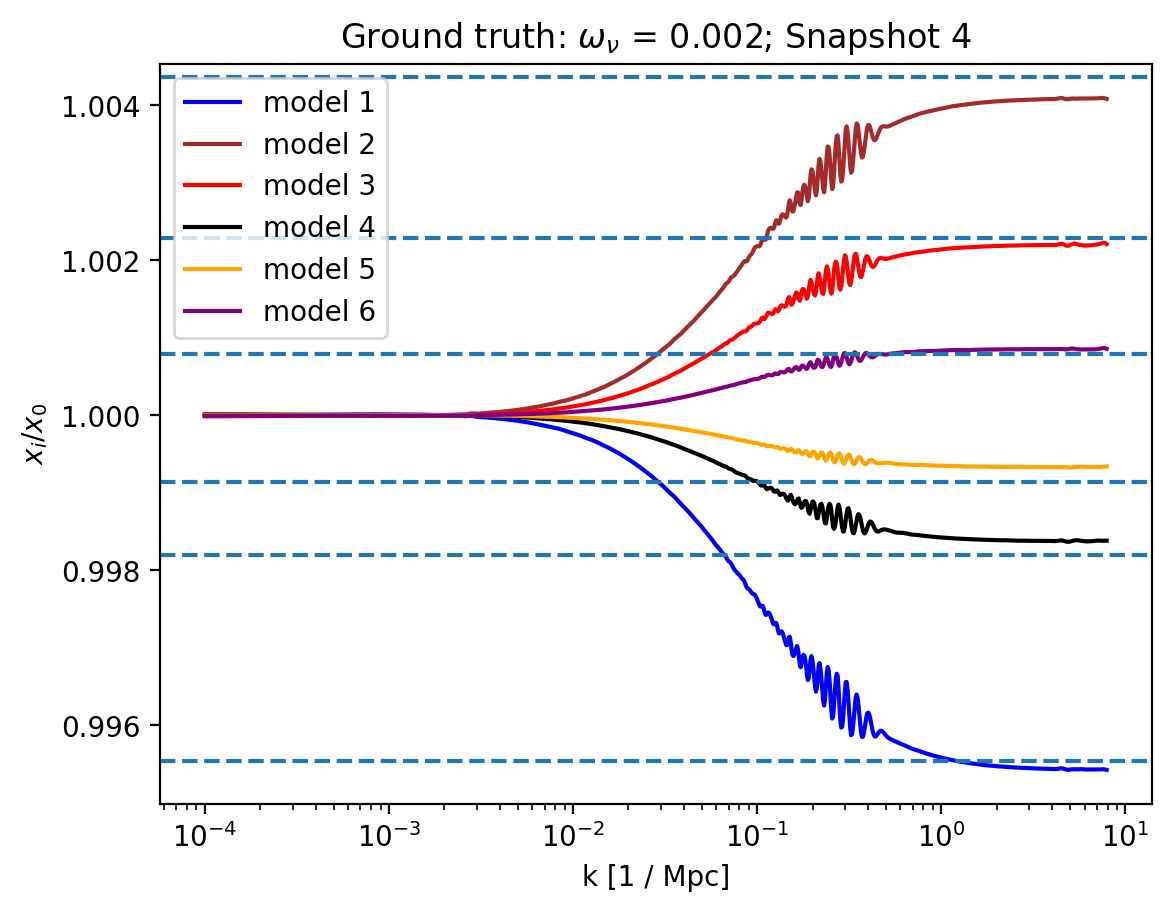

In [26]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
#for asymptote in predicted_asymptotes:
#    axs.axhline(asymptote, linestyle='--')
#axs.axhline(predicted_asymptotes[1], linestyle='--')
for i in range(len(true_asymptotes)):
    axs.axhline(m * onh2 * (A_s[i + 1] / A_s[0]) + b, linestyle='--')

## 